In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam
# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [3]:

(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

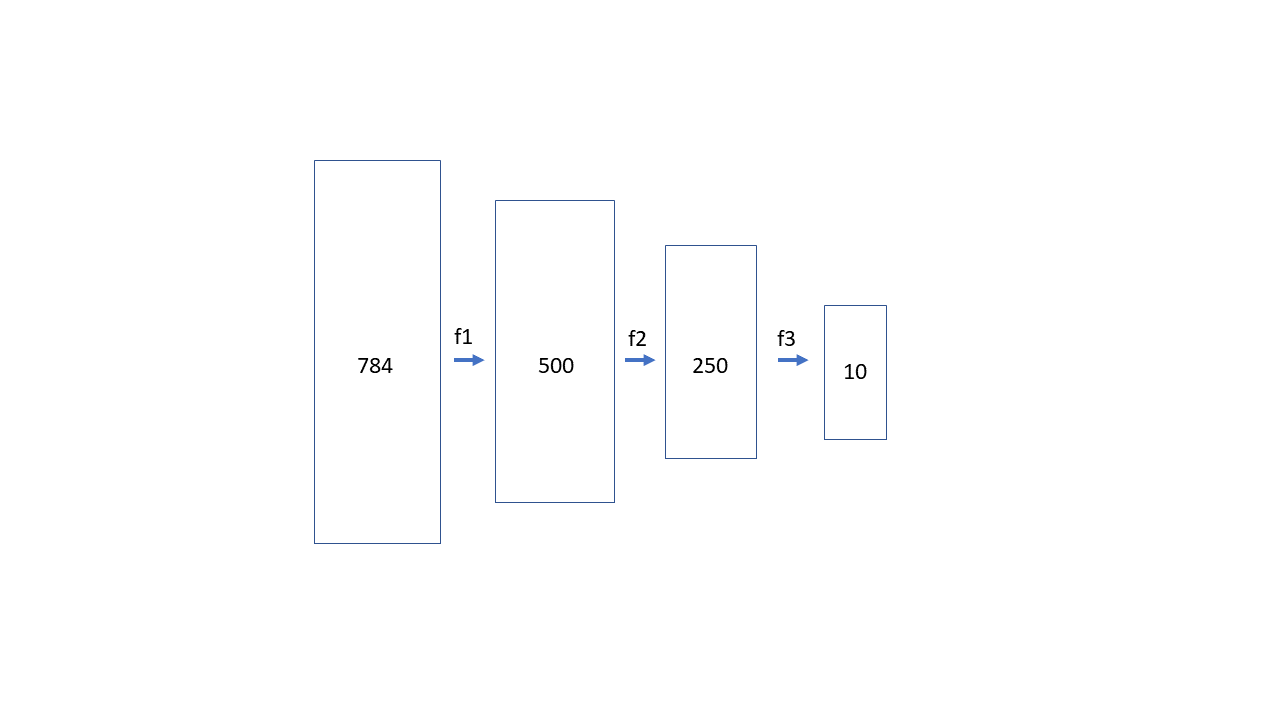

In [34]:
#定義兩層隱藏層以及一層隱藏成的運算結果

f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(250, activation='sigmoid')
f_3 = Dense(10, activation='softmax')

from IPython.display import Image
Image(filename="image.png")

In [35]:
#定義第一個輸入變數
x = Input(shape=(784,))

In [36]:
a= f_1(x)
b= f_2(a)
y= f_3(b)

In [37]:
#將模型輸入和輸出包裝起來
model = Model(x,y)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, 
          batch_size=256, 
          epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 12s 197us/sample - loss: 0.0358 - acc: 0.7494
Epoch 2/7
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0224 - acc: 0.8455
Epoch 3/7
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0207 - acc: 0.8565
Epoch 4/7
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0193 - acc: 0.8667
Epoch 5/7
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0186 - acc: 0.8725
Epoch 6/7
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0176 - acc: 0.8795
Epoch 7/7
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0169 - acc: 0.8849


In [40]:
model.save_weights('MNIST_Model.h5')
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 1s 20us/sample - loss: 0.0164 - acc: 0.8877
Loss: 0.016398967243731022
準確率: 88.77333402633667


In [43]:
from tensorflow.keras.layers import concatenate, add
c = Dense(250, activation='relu')
z = c(a)

# new f_3
f_3 = Dense(10, activation='softmax')

u = concatenate([b, z])
y = f_3(u)

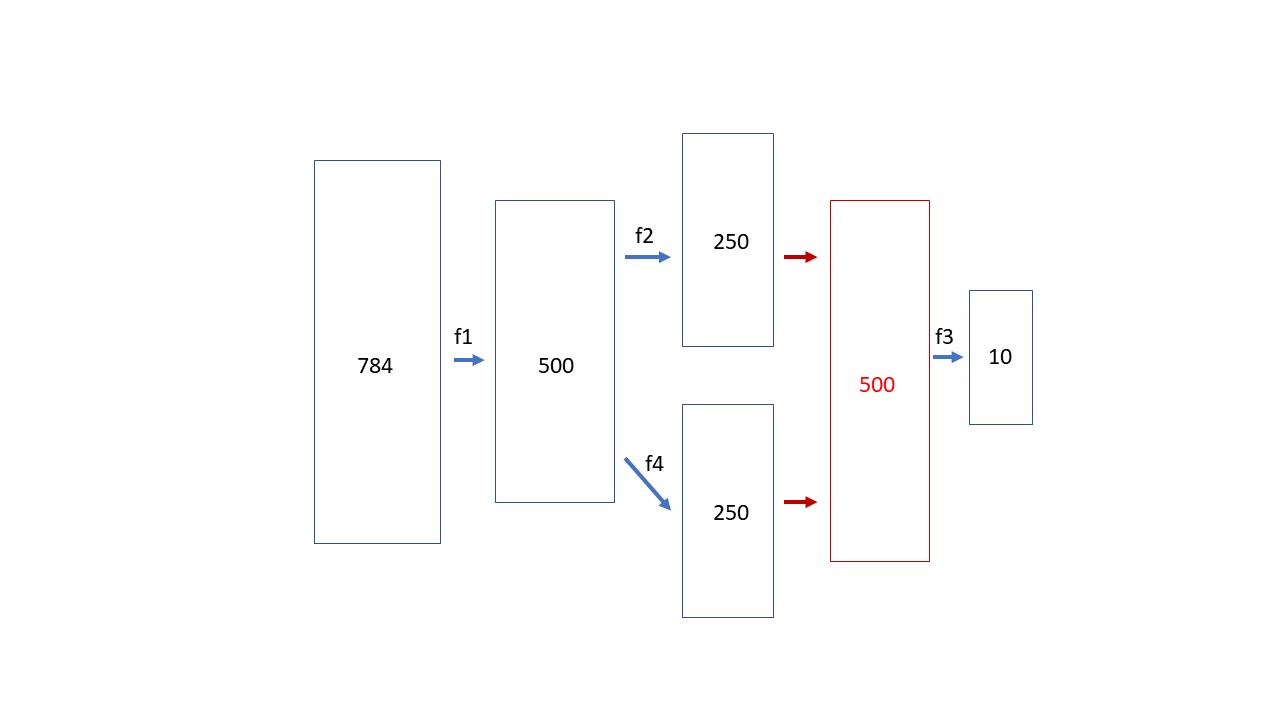

In [44]:
from IPython.display import Image
Image(filename="image2.png")

In [45]:
model = Model(x, y)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 500)          392500      input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 250)          125250      dense_6[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 250)          125250      dense_6[0][0]                    
____________________________________________________________________________________________

In [46]:
model.compile(loss='mse', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, 
          batch_size=256, 
          epochs=7)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 33s 558us/sample - loss: 0.0206 - acc: 0.8571
Epoch 2/7
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0169 - acc: 0.8849
Epoch 3/7
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0164 - acc: 0.8878
Epoch 4/7
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0156 - acc: 0.8931
Epoch 5/7
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0151 - acc: 0.8968
Epoch 6/7
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0147 - acc: 0.9001
Epoch 7/7
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0142 - acc: 0.9035


In [48]:
model.save_weights('MNIST_Model.h5')
score = model.evaluate(X_train, y_train, batch_size=10000)
print(f'Loss: {score[0]}')
print(f'準確率: {score[1]*100}')

60000/60000 [==============================] - 9s 142us/sample - loss: 0.0132 - acc: 0.9122
Loss: 0.013162143994122744
準確率: 91.22166633605957


In [49]:
#相較前者準確率高了3%